In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

**UPLOAD DATA CSV**

In [ ]:
# Mount in Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepaths_Aurora = [f for f in os.listdir(".") if f.endswith('Aurora.csv')]
df_Aurora = pd.concat(map(pd.read_csv, filepaths_Aurora))
df_Aurora.shape

(12000, 7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepaths_Letizia = [f for f in os.listdir(".") if f.startswith('Letizia')]
df_Letizia = pd.concat(map(pd.read_csv, filepaths_Letizia))
df_Letizia.shape

(12000, 7)

In [ ]:
filepaths_Natalia = [f for f in os.listdir(".") if f.endswith('Natalia.csv')]
df_Natalia = pd.concat(map(pd.read_csv, filepaths_Natalia))
df_Natalia.shape

(12000, 7)

In [ ]:
filepaths_Adelaide = [f for f in os.listdir(".") if f.endswith('Adelaide.csv')]
df_Adelaide = pd.concat(map(pd.read_csv, filepaths_Adelaide))
df_Adelaide.shape

(12000, 7)

In [ ]:
filepaths_noshot = [f for f in os.listdir(".") if f.endswith('_NOSHOT.csv')]
df_noshot = pd.concat(map(pd.read_csv, filepaths_noshot))
df_noshot.shape

(8000, 7)

In [ ]:
#df_all = pd.concat([df_Aurora, df_Natalia,df_Letizia, df_Adelaide] , axis= 0)
df_all = pd.concat([df_Aurora, df_Natalia,df_Letizia, df_Adelaide, df_noshot] , axis= 0)
df_all = df_all.reset_index(drop=True)
df_all


,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
0,1.945312,0.902344,-1.429688,70.50,-149.500,140.500,0.0
1,1.945312,0.902344,-1.429688,70.50,-149.500,140.500,0.0
2,1.945312,0.902344,-1.429688,70.50,-149.500,140.500,0.0
3,1.945312,0.902344,-1.429688,70.50,-149.500,140.500,0.0
4,1.945312,0.884766,-1.424805,67.75,-149.125,139.750,0.0
...,...,...,...,...,...,...,...
55995,1.062500,1.798828,-1.939453,249.75,-245.500,-247.625,3.0
55996,1.060547,1.798828,-1.939453,249.75,-245.375,-247.875,3.0
55997,1.060547,1.798828,-1.939453,249.75,-245.375,-247.875,3.0
55998,1.060547,1.798828,-1.939453,249.75,-245.375,-247.875,3.0


In [ ]:
# Save the full training dataset (not cleaned yet)
df_all.to_csv('training_dataset.csv')

In [ ]:
# Cleaning the dataset
df_all.replace([np.inf, -np.inf], np.nan, inplace=True)
df_all.dropna(inplace=True)
df_all = df_all.reset_index(drop=True)
df_all.shape

(55415, 7)

In [ ]:
df_all

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,label
0,1.945312,0.902344,-1.429688,70.50,-149.500,140.500,0.0
1,1.945312,0.902344,-1.429688,70.50,-149.500,140.500,0.0
2,1.945312,0.902344,-1.429688,70.50,-149.500,140.500,0.0
3,1.945312,0.902344,-1.429688,70.50,-149.500,140.500,0.0
4,1.945312,0.884766,-1.424805,67.75,-149.125,139.750,0.0
...,...,...,...,...,...,...,...
55410,1.062500,1.798828,-1.939453,249.75,-245.500,-247.625,3.0
55411,1.060547,1.798828,-1.939453,249.75,-245.375,-247.875,3.0
55412,1.060547,1.798828,-1.939453,249.75,-245.375,-247.875,3.0
55413,1.060547,1.798828,-1.939453,249.75,-245.375,-247.875,3.0


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55415 entries, 0 to 55414
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACC_X   55415 non-null  float64
 1   ACC_Y   55415 non-null  float64
 2   ACC_Z   55415 non-null  float64
 3   GYR_X   55415 non-null  float64
 4   GYR_Y   55415 non-null  float64
 5   GYR_Z   55415 non-null  float64
 6   label   55415 non-null  float64
dtypes: float64(7)
memory usage: 3.0 MB


**SPLITTING DATASET**

In [ ]:
# TARGET VARIABLE = TYPE OF SHOT
y = df_all["label"]
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
55410    3.0
55411    3.0
55412    3.0
55413    3.0
55414    3.0
Name: label, Length: 55415, dtype: float64

In [ ]:
# EXPLANATORY VARIABLES = GYROSCOPE &  ACCELEROMETER MEASURES
X = df_all.drop("label", axis=1) 
X

,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z
0,1.945312,0.902344,-1.429688,70.50,-149.500,140.500
1,1.945312,0.902344,-1.429688,70.50,-149.500,140.500
2,1.945312,0.902344,-1.429688,70.50,-149.500,140.500
3,1.945312,0.902344,-1.429688,70.50,-149.500,140.500
4,1.945312,0.884766,-1.424805,67.75,-149.125,139.750
...,...,...,...,...,...,...
55410,1.062500,1.798828,-1.939453,249.75,-245.500,-247.625
55411,1.060547,1.798828,-1.939453,249.75,-245.375,-247.875
55412,1.060547,1.798828,-1.939453,249.75,-245.375,-247.875
55413,1.060547,1.798828,-1.939453,249.75,-245.375,-247.875


**TRAIN & TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,   #We are taking a test size of 25% and a train size of 75%
                                                    stratify=y,        #in order to preserve target propotions.
                                                    random_state= 123) #fix random seed for replicability
print(X_train.shape, X_test.shape)

(38790, 6) (16625, 6)


**MULTICLASS CLASSIFICATION PROBLEM**

Classifiers trained:
- decision tree
- logistic regression
- KNN
- random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics, datasets
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import math

In [ ]:
# Function which reports which are the best hyperparameters for a classifier using Grid Search

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1_micro', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred, average = 'micro'))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
# Function which shows the confusion matrix which of the trained classifier

def cnf_matrix_multinomial(model,X_train,y_train,X_test,y_test):
    #fit the classifier
    chosen_classifier = model.fit(X_train, y_train)
    #predicted labels
    y_pred = model.predict(X_test)
    #build confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(cnf_matrix)   
    #show confusion matrix
    disp = plot_confusion_matrix(chosen_classifier, X_test, y_test,
                                 display_labels=["dirtto", "rovescio", "battuta", "no_shot"],
                                 cmap=plt.cm  .Blues)
    plt.title('Confusion matrix of the 4-classes supervised problem')
    plt.show()

* DECISION TREE

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [5,10,15,20],
              'min_samples_split': [10,15,20],
              'min_samples_leaf': [8,10]}

hyperp_search(classifier,parameters)

f1_train: 0.974684 using {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 10}
f1_test:  0.982015037593985
[[4565  187   17    1]
 [  46 4723   13    2]
 [  26    2 4754    0]
 [   0    5    0 2284]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      4770
         1.0       0.96      0.99      0.97      4784
         2.0       0.99      0.99      0.99      4782
         3.0       1.00      1.00      1.00      2289

    accuracy                           0.98     16625
   macro avg       0.98      0.98      0.98     16625
weighted avg       0.98      0.98      0.98     16625

CPU times: user 1.49 s, sys: 142 ms, total: 1.64 s
Wall time: 15.7 s


In [ ]:
#best model according to GridSearch
model_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20  , min_samples_leaf =8, min_samples_split = 10)

[[4565  187   17    1]
 [  48 4721   13    2]
 [  26    2 4754    0]
 [   0    5    0 2284]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


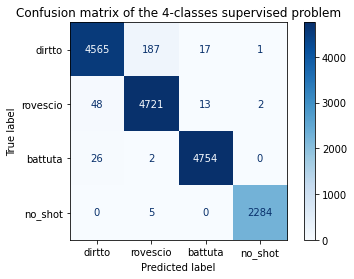

In [ ]:
#confusion matrix
cnf_matrix_multinomial(model_tree,X_train,y_train,X_test,y_test)

* LOGISTIC REGRESSION

In [ ]:
%%time 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], 
              "max_iter":[1000, 2000]}

hyperp_search(classifier,parameters)

f1_train: 0.538928 using {'C': 10, 'max_iter': 1000}
f1_test:  0.5350375939849624
[[2611 1166  789  204]
 [ 954 3186  388  256]
 [1789  890 1682  421]
 [ 211  283  379 1416]]
              precision    recall  f1-score   support

         0.0       0.47      0.55      0.51      4770
         1.0       0.58      0.67      0.62      4784
         2.0       0.52      0.35      0.42      4782
         3.0       0.62      0.62      0.62      2289

    accuracy                           0.54     16625
   macro avg       0.55      0.55      0.54     16625
weighted avg       0.53      0.54      0.53     16625

CPU times: user 15.4 s, sys: 10.5 s, total: 25.9 s
Wall time: 2min 30s


In [ ]:
#best model according to GridSearch
model_lr = LogisticRegression(C=10, max_iter=1000)

[[2611 1166  789  204]
 [ 954 3186  388  256]
 [1789  890 1682  421]
 [ 211  283  379 1416]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


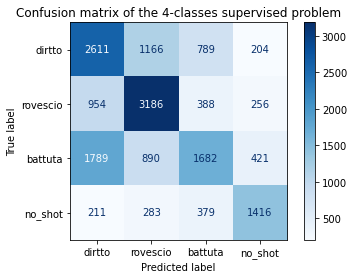

In [ ]:
#confusion matrix
cnf_matrix_multinomial(model_lr,X_train,y_train,X_test,y_test)

* KNN

In [ ]:
%%time 
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,100,500)}

hyperp_search(classifier,parameters)

f1_train: 0.949111 using {'n_neighbors': 10}
f1_test:  0.9747368421052631
[[4713   19   32    6]
 [ 181 4550   42   11]
 [  65   61 4653    3]
 [   0    0    0 2289]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      4770
         1.0       0.98      0.95      0.97      4784
         2.0       0.98      0.97      0.98      4782
         3.0       0.99      1.00      1.00      2289

    accuracy                           0.97     16625
   macro avg       0.98      0.98      0.98     16625
weighted avg       0.98      0.97      0.97     16625

CPU times: user 656 ms, sys: 8.35 ms, total: 664 ms
Wall time: 1.94 s


In [ ]:
#best model according to GridSearch
model_knn = KNeighborsClassifier(n_neighbors = 10)

[[4713   19   32    6]
 [ 181 4550   42   11]
 [  65   61 4653    3]
 [   0    0    0 2289]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


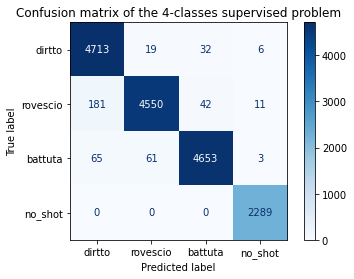

In [ ]:
#confusion matrix
cnf_matrix_multinomial(model_knn,X_train,y_train,X_test,y_test)

* RANDOM FOREST 

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
parameters = {'n_estimators':[10,20,30],
              'criterion':['entropy', 'gini'],
              'max_depth':[5,10,15], 
              'min_samples_split' : [3,5],
              'min_samples_leaf' :[2,5]
              }

hyperp_search(classifier,parameters)


f1_train: 0.991338 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 30}
f1_test:  0.9912781954887218
[[4633  136    1    0]
 [   7 4776    0    1]
 [   0    0 4782    0]
 [   0    0    0 2289]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      4770
         1.0       0.97      1.00      0.99      4784
         2.0       1.00      1.00      1.00      4782
         3.0       1.00      1.00      1.00      2289

    accuracy                           0.99     16625
   macro avg       0.99      0.99      0.99     16625
weighted avg       0.99      0.99      0.99     16625

CPU times: user 4.29 s, sys: 234 ms, total: 4.53 s
Wall time: 1min 50s


In [ ]:
#best model according to GridSearch
model_rf = RandomForestClassifier(n_estimators=30, 
                                  criterion='entropy', 
                                  max_depth=15, 
                                  min_samples_split=3, 
                                  min_samples_leaf=2)

[[4626  143    1    0]
 [   2 4782    0    0]
 [   0    0 4782    0]
 [   0    0    0 2289]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


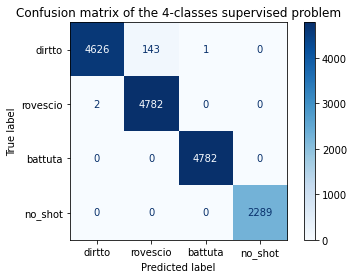

In [ ]:
#confusion matrix
cnf_matrix_multinomial(model_rf,X_train,y_train,X_test,y_test)

The best classifier is Random Forest due to
- high F1 score for both training and test
- close F1 scores for training and test, meaning no overfitting problems
- interpretability